In [206]:
# import libraries
import numpy as np

# import for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# for sci-learn 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from skimage import exposure

# load dataset
digits = load_digits()

In [207]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


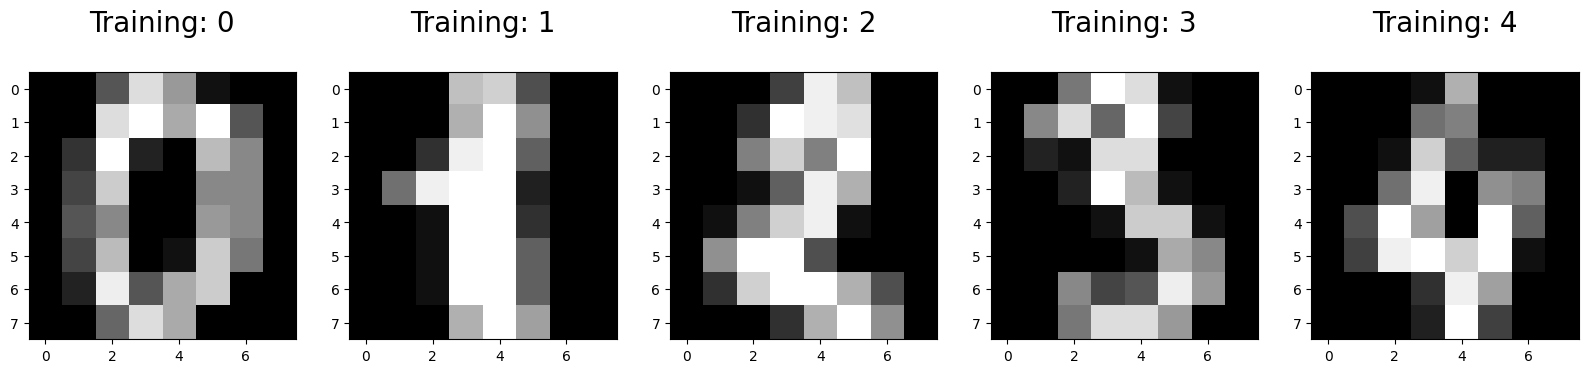

In [208]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [209]:
# Spliting the data features and target
X = digits.data
y = digits.target

# Reshape the images to 2D arrays
X = X.reshape(-1, 8, 8)
X.shape

(1797, 8, 8)

### Pre-Processing 
Step to create the bigger contrast to help better pixel recognistion 

In [210]:
# Preprocess the images
X_preprocessed = []
for image in X:
    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

    # Flatten the preprocessed image to convert to 1D array
    img_flat = img_rescale.flatten()
    X_preprocessed.append(img_flat)

In [211]:
X_preprocessed = np.array(X_preprocessed)

### Spliting the data
 The purpose of the train and test sets is to evaluate the performance of the machine learning model.
 The training set is used to train the model, while the test set is used to evaluate how well the model generalizes to unseen data.



In [212]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

### Modeling

In [213]:
# Create a Random Forest Classifier (with random parameter that has been manualy choosen)
rf_classifier = RandomForestClassifier(n_estimators=30, random_state=42)

# fit the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [214]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print('Random Forest Classifier:')
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

Random Forest Classifier:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


### Hyperparameter Tuning
Parameter Tuning Explanation
 I chose the n_estimators parameter as it is one of the most critical aspects of the random forest.
This paramater is the one that controls number of single trees so it is providing the complexity for the sample testing of all posible outcomes.
This parameter allows to optimize the number of trees in the Random Forest, balancing performance improvements with computational efficiency.



In [215]:
# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [30,100,150,200 ],
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=30, random_state=42),
             param_grid={'n_estimators': [30, 100, 150, 200]})

In [216]:
# fitting the parameters to check the best tuning
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [217]:
# Make predictions on the test set
y_pred_tuned = best_rf.predict(X_test)

# Evaluate the performance
accuracy_best = accuracy_score(y_test, y_pred_tuned)
precision_best = precision_score(y_test, y_pred_tuned, average='macro')
recall_best = recall_score(y_test, y_pred_tuned, average='macro')
f1_best = f1_score(y_test, y_pred_tuned, average='macro')

# Print the results
print('Random Forest Classifier:')
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

Random Forest Classifier:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


I have chose to setup the n_estimators to 150 as the GridSearchCV made a checks and provided that the best value for the n_estimators is 150

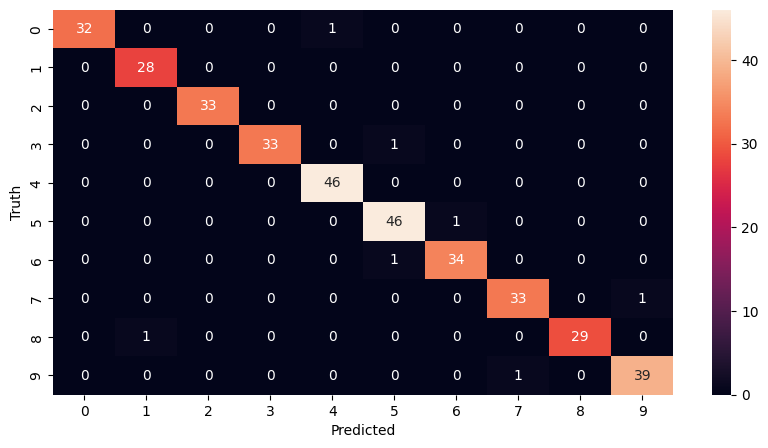

In [218]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [220]:
# Print the classification report
class_report = classification_report(y_test, y_pred_tuned, target_names=digits.target_names.astype(str))
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



From the above results I think the most struglle for the identification is class 5,6,7,9